<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пишите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [26]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [27]:
# YOUR CODE
# Случайные строчки
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4500,72,24.30,1778.7,Female,1,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2572,1,49.50,49.5,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,0
2216,1,20.55,20.55,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
1130,70,19.85,1328.35,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
1978,58,102.10,5885.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1


Посмотрим на типы данных в столбцах и на уникальные значения.

In [28]:
for column in train:
  print("\n", column, ":", train[column].dtypes, ":", [string for string in train[column].unique()])


 ClientPeriod : int64 : [55, 72, 1, 32, 60, 25, 27, 50, 16, 70, 69, 26, 38, 30, 52, 71, 59, 61, 7, 20, 48, 22, 2, 21, 44, 66, 58, 46, 45, 5, 4, 3, 62, 6, 39, 68, 51, 40, 10, 43, 12, 35, 31, 67, 8, 11, 29, 37, 33, 14, 15, 47, 23, 65, 13, 41, 53, 9, 64, 42, 34, 17, 18, 63, 56, 54, 24, 28, 49, 19, 57, 36, 0]

 MonthlySpending : float64 : [19.5, 25.85, 75.9, 79.3, 115.25, 19.8, 90.15, 45.7, 105.95, 61.2, 78.75, 113.05, 99.5, 38.85, 102.6, 90.05, 53.75, 90.3, 19.85, 102.7, 84.9, 79.0, 45.3, 104.15, 20.25, 101.05, 104.6, 90.0, 89.7, 26.05, 20.35, 73.85, 75.15, 105.2, 105.5, 19.2, 112.2, 95.9, 84.85, 20.85, 74.45, 86.1, 76.95, 49.4, 55.15, 19.7, 19.9, 29.75, 102.1, 86.65, 89.4, 96.4, 94.3, 103.75, 20.15, 83.45, 81.0, 110.05, 48.45, 89.8, 19.75, 24.4, 79.8, 100.0, 45.85, 20.05, 82.4, 74.85, 20.1, 96.75, 50.5, 85.7, 55.85, 20.9, 103.25, 20.5, 84.75, 105.9, 50.55, 65.45, 24.15, 69.65, 45.75, 85.95, 85.2, 79.25, 29.6, 106.6, 85.35, 108.3, 20.65, 55.0, 19.3, 40.65, 19.45, 104.05, 54.25, 69.75, 65

Отметим, что TotalSpent состоит из объектов, но должен быть из чисел.  Исправим это.



In [29]:
train["TotalSpent"] = pd.to_numeric(train["TotalSpent"], errors="coerce")
test["TotalSpent"] = pd.to_numeric(test["TotalSpent"], errors="coerce")

Посмотрим на пропуски в данных.

In [30]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [31]:
# Посмотрим, с чем связано наличие nan'ов в данных

train[pd.to_numeric(train["TotalSpent"], errors='coerce').isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [32]:
# Для всех таких данных ClientPeriod = 0. Данное стечение обстоятельств исправим заполнением нулей на месте пропущенных данных.

train["TotalSpent"] = train["TotalSpent"].fillna(0)
test["TotalSpent"] = test["TotalSpent"].fillna(0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

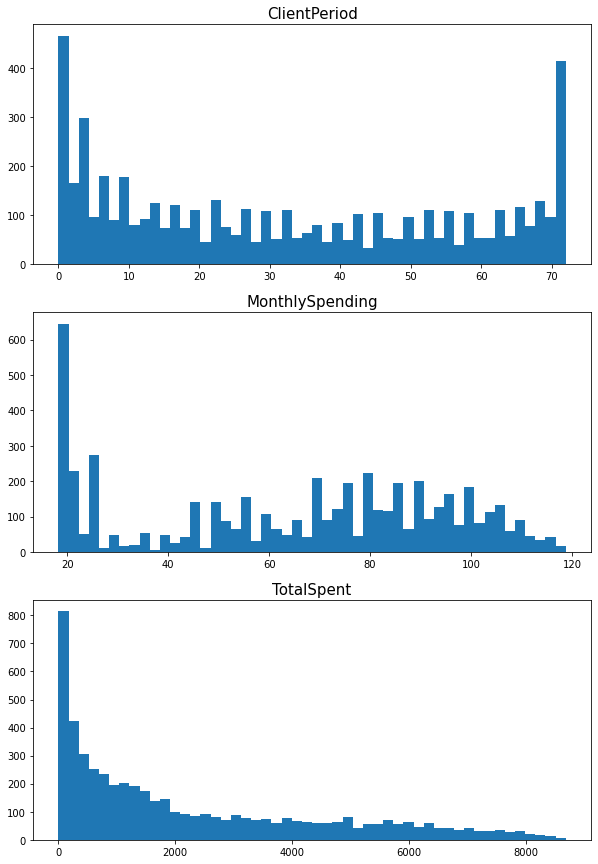

In [33]:
# YOUR CODE

fig, ax = plt.subplots(3, 1, figsize=(10,15))

for n, col in enumerate(num_cols):
    ax = ax.flatten()
    ax[n].hist(train[col], bins=50)
    ax[n].set_title(col, size=15)

plt.show()

In [34]:
train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


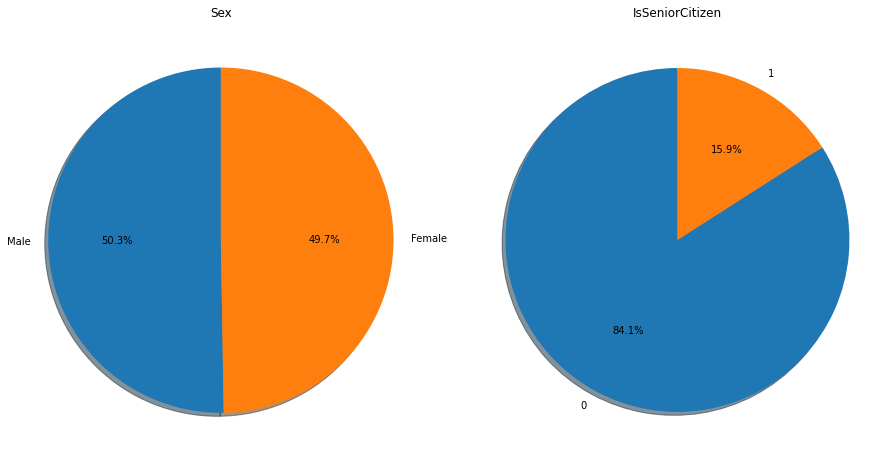

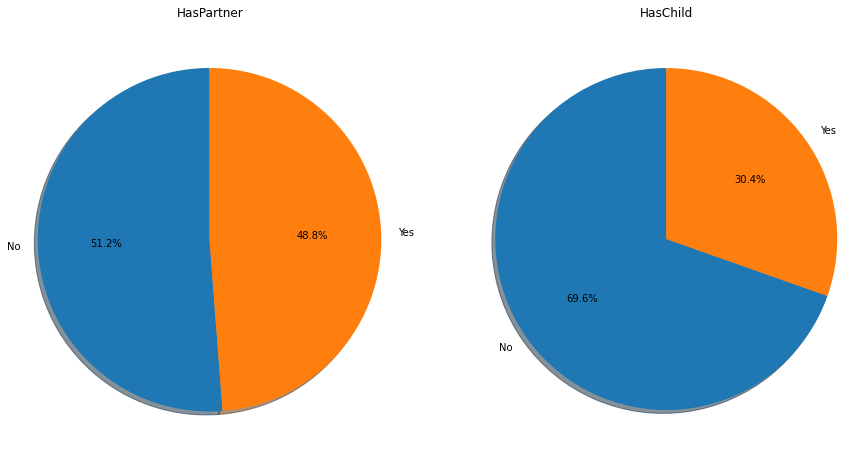

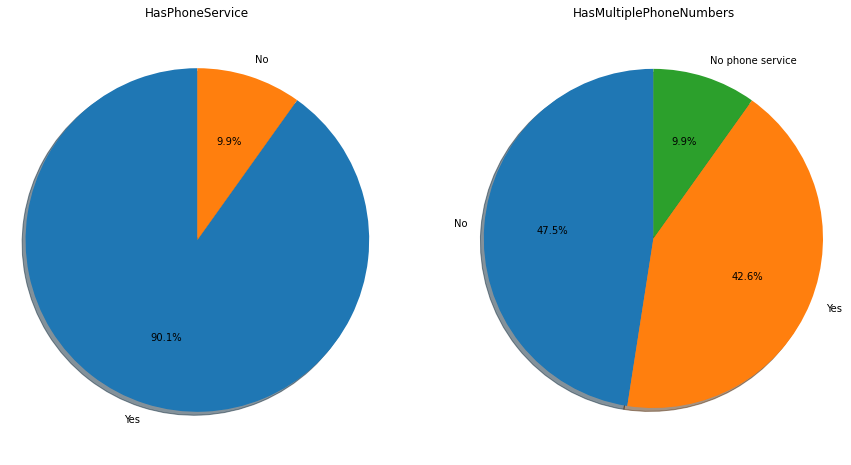

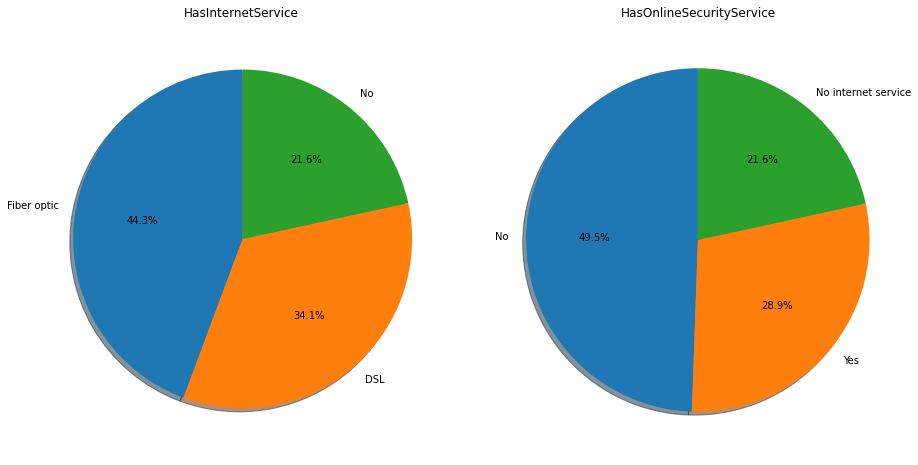

In [35]:
for i in range(0,len(cat_cols)//2,2):
    plt.figure(figsize=(15,8))
    for n, x in enumerate(cat_cols[i:i+2],1):
        plt.subplot(1, 2, n)
        ds = train[x].value_counts()
        plt.pie(ds, labels=ds.index, autopct='%1.1f%%', shadow=True, startangle=90)
        plt.axis('equal')
        plt.title(x)
    plt.show()

In [36]:
train[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Класс 1 почти в 3 раза больше класса 0. Данные слегка не сбалансированы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [45]:
# YOUR CODE

scaler = StandardScaler()

dummy_features = pd.get_dummies(train[cat_cols])
X = pd.concat([train[num_cols], dummy_features], axis=1)
X_origin = train.iloc[:, :-1]
y = train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
c_values = [100, 10, 1, 0.1, 0.01, 0.001]

search = LogisticRegressionCV(Cs=c_values, cv=5, n_jobs=-1, refit=True, scoring='roc_auc')

search.fit(X_train_scaled, y_train)

print(search.C_)
y_train_predicted = search.predict_proba(X_train_scaled)[:, 1]
y_test_predicted = search.predict_proba(X_test_scaled)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc, test_auc

[100.]


(0.8538362553027673, 0.826807103739345)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

100, 0.826807...

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [47]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [61]:
import catboost
# YOUR CODE

# cat_cols = [train.columns.get_loc(c) for c in cat_cols]

X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

boosting_model = catboost.CatBoostClassifier(n_estimators=50, 
                                             cat_features=cat_cols)

param_grid = { 
               'learning_rate': np.linspace(0, 1, 11),
               'l2_leaf_reg': np.linspace(0, 1, 11)             
              }
boosting_model.grid_search(param_grid, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
6:	learn: 0.3992260	test: 0.4462613	best: 0.4462613 (6)	total: 44.7ms	remaining: 274ms
7:	learn: 0.3948300	test: 0.4432393	best: 0.4432393 (7)	total: 51.1ms	remaining: 268ms
8:	learn: 0.3914331	test: 0.4403743	best: 0.4403743 (8)	total: 57.8ms	remaining: 263ms
9:	learn: 0.3854222	test: 0.4389354	best: 0.4389354 (9)	total: 64.5ms	remaining: 258ms
10:	learn: 0.3844042	test: 0.4389556	best: 0.4389354 (9)	total: 71.2ms	remaining: 252ms
11:	learn: 0.3784918	test: 0.4363782	best: 0.4363782 (11)	total: 78ms	remaining: 247ms
12:	learn: 0.3740888	test: 0.4342261	best: 0.4342261 (12)	total: 84.8ms	remaining: 241ms
13:	learn: 0.3737166	test: 0.4338670	best: 0.4338670 (13)	total: 99.8ms	remaining: 257ms
14:	learn: 0.3709016	test: 0.4339755	best: 0.4338670 (13)	total: 110ms	remaining: 256ms
15:	learn: 0.3679534	test: 0.4335663	best: 0.4335663 (15)	total: 117ms	remaining: 248ms
16:	learn: 0.3673875	test: 0.4325864	best: 0.4325864 (1

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49],
            

In [62]:
print(boosting_model.tree_count_)
print(boosting_model.learning_rate_)

50
0.10000000149011612


In [63]:
boosting_model = catboost.CatBoostClassifier(n_estimators=50, learning_rate=0.1, l2_leaf_reg=0.4, silent=True, cat_features=cat_cols, eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train, cat_features=cat_cols)


y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

In [64]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc, test_auc

(0.8691578246145801, 0.8270864694637101)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.8271, n_estimators = 50, learing_rate = 0.1

# Предсказания

In [65]:
best_model = boosting_model # какая-то предыдущая модель

In [71]:
# X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv')


# submission['Churn'] = best_model.predict_proba(X_test)[:,1] # best_model.predict_proba(X_test) / best_model.predict(X_test)

prediction = pd.DataFrame(best_model.predict_proba(test)[:, 1])
prediction.head(3)

,0
0,0.064590
1,0.683528
2,0.675213


In [72]:
prediction.rename(columns={0:'Churn'}, inplace=True)
prediction.index = prediction.index.rename('Id')
prediction.head(3)

,Churn
Id,
0,0.064590
1,0.683528
2,0.675213


In [73]:
prediction.to_csv('submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.